# Information Extraction on Reuters dataset

We will process the NLTK Reuters corpus for entitiy extraction and construct entity profiles of persons, organizations, and locations. We will apply spaCy English model to extract such information from text.

## Import necessary libraries 

In [1]:
# import the corpus
from nltk.corpus import reuters

In [2]:
# import Spacy as a default entity recognizer.
import spacy
# you msay run into some issues to load the model. In case, check at https://spacy.io/usage/models
nlp = spacy.load('en')

In [3]:
# libraries needed
import itertools
from nltk.corpus import reuters
import nltk.data
from nltk.tokenize import TreebankWordTokenizer
sentence_tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')
treebank_tokenizer = TreebankWordTokenizer()
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Function to extract the entity, document id, and relevant sentence text

In [4]:
def extract_entities(doc_id, doc_text):
    analyzed_doc = nlp(doc_text)
    
    # these dictionaries to include all the persons, organizations, and locations in ONE document
    # key: text of the entity, value: (document_id, list of text of the sentences)
    
    doc_persons = {}
    doc_organizations = {}
    doc_locations = {}
    
    doc_persons_clean = {}
    doc_organizations_clean = {}
    doc_locations_clean = {}
    
    for entity in analyzed_doc.ents:
        if entity.text.strip() != "":
            
            relevant_sentence = (doc_id, entity.sent.text)
            
            # add the relevant document id and sentence to the entity record
            if entity.label_ == 'PERSON':
                #if entity.text.strip() not in doc_persons.keys():
                doc_persons[entity.text.strip()]=relevant_sentence
#                 else:
#                     doc_persons[entity.text.strip()].append(relevant_sentence)
            
            if entity.label_ == 'ORG':
#                 if entity.text.strip() not in doc_organizations.keys():
                doc_organizations[entity.text.strip()]=relevant_sentence
#                 else:
#                     doc_organizations[entity.text.strip()].append(relevant_sentence)
                
            if entity.label_ == 'GPE':
#                 if entity.text.strip() not in doc_locations.keys():
                doc_locations[entity.text.strip()]=relevant_sentence
#                 else:
#                     doc_locations[entity.text.strip()].append(relevant_sentence)

    #doc_persons_clean = names_resolution(doc_persons)     
    #doc_locations_clean = names_resolution(doc_locations)
        
    return doc_persons, doc_organizations, doc_locations
        

## Call extraction function on entire corpus and create master dictionaries of entities

In [5]:
num_docs = len(reuters.fileids())

# dictionaries to incorporate entities for ALL corpus 
combined_persons = {}
combined_organizations = {}
combined_locations = {}

for doc_id in reuters.fileids()[:500]: 
    persons, organizations, locations = extract_entities(doc_id, reuters.open(doc_id).read())
#     print('\n')
#     print("Persons: ", persons)
#     print('\n')
#     print("Organizations: ", organizations)
#     print('\n')
#     print("Locations: ", locations)
    
    # persons
    for person, text in persons.items():
         if person not in combined_persons.keys():
                combined_persons[person] = text
    
    # orgs
    for org, text in organizations.items():
         if org not in combined_organizations.keys():
                combined_organizations[org] = text
                
    # locations
    for location, text in locations.items():
         if location not in combined_locations.keys():
                combined_locations[location] = text

# print('\n')
# print("Persons: ", combined_persons)
# print('\n')
# print("Organizations: ", combined_organizations)
# print('\n')
# print("Locations: ", combined_locations)


## Function to determine the most popular entities based on number of mentions in corpus

In [6]:
# we will focus on the top 500 entities for each category by frequency of their sentences
def find_most_popular_entities(entity_dictionary):

    sorted(entity_dictionary.items(), key=lambda key:len(entity_dictionary.values()), reverse=True)
    
    list_of_dictionary_keys_with_most_mentions = []
    for keys in entity_dictionary.keys():
        list_of_dictionary_keys_with_most_mentions.append(keys)
    
    return list_of_dictionary_keys_with_most_mentions[:500]


## Invoke top entities function

In [7]:
top_persons = find_most_popular_entities(combined_persons)
top_organizations = find_most_popular_entities(combined_organizations)
top_locations = find_most_popular_entities(combined_locations)

## Analyze most popular entities to determine what words they most frequently occur with

In [8]:
# dictionary for most frequent tokens associated with person entities for top 500
person_most_popular_terms = {}
for person in top_persons:
    # dictionary for most frequent tokens associated with person entities
    top_terms_pperson = {}
    for key, text in combined_persons.items():
        
        punkt_sentences = sentence_tokenizer.tokenize(text[1])
        sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
        all_tokens = [word for sentence in sentences_words for word in sentence]
        all_tokens = [word.lower() for word in all_tokens if word.isalpha()]
        stop_words = nltk.corpus.stopwords.words('english')
        all_tokens = [w for w in all_tokens if w not in stop_words]
        
        # dictionary for tokens frequency
        person_token_dictionary = {}

        for t in all_tokens:
            if t not in person_token_dictionary.keys():
                person_token_dictionary[t] = 1
            else:
                person_token_dictionary[t] += 1

        sort_tok = sorted(person_token_dictionary.items(), key=lambda x:x[1], reverse=True)

        most_freq = [p[0] for p in sort_tok if p[1] > 1]
        
        top_terms_pperson[key] = most_freq
        
    for key, values in top_terms_pperson.items():
        if key != person:
            continue
        person_most_popular_terms[key] = values   
        

In [9]:
# dictionary for most frequent tokens associated with organization entities for top 500
organization_most_popular_terms = {}
for org in top_organizations:
    # dictionary for most frequent tokens associated with organization entities
    top_terms_porg = {}
    for key, text in combined_organizations.items():
        
        punkt_sentences = sentence_tokenizer.tokenize(text[1])
        sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
        all_tokens = [word for sentence in sentences_words for word in sentence]
        all_tokens = [word.lower() for word in all_tokens if word.isalpha()]
        stop_words = nltk.corpus.stopwords.words('english')
        all_tokens = [w for w in all_tokens if w not in stop_words]
        
        # dictionary for tokens frequency
        org_token_dictionary = {}

        for t in all_tokens:
            if t not in org_token_dictionary.keys():
                org_token_dictionary[t] = 1
            else:
                org_token_dictionary[t] += 1

        sort_tok = sorted(org_token_dictionary.items(), key=lambda x:x[1], reverse=True)

        most_freq = [p[0] for p in sort_tok if p[1] > 1]
        
        top_terms_porg[key] = most_freq
        
    for key, values in top_terms_porg.items():
        if key != org:
            continue
        organization_most_popular_terms[key] = values   


In [10]:
# dictionary for most frequent tokens associated with location entities for top 500
location_most_popular_terms = {}
for loc in top_locations:
    # dictionary for most frequent tokens associated with location entities
    top_terms_ploc = {}
    for key, text in combined_locations.items():
        
        punkt_sentences = sentence_tokenizer.tokenize(text[1])
        sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
        all_tokens = [word for sentence in sentences_words for word in sentence]
        all_tokens = [word.lower() for word in all_tokens if word.isalpha()]
        stop_words = nltk.corpus.stopwords.words('english')
        all_tokens = [w for w in all_tokens if w not in stop_words]
        
        # dictionary for tokens frequency
        loc_token_dictionary = {}

        for t in all_tokens:
            if t not in loc_token_dictionary.keys():
                loc_token_dictionary[t] = 1
            else:
                loc_token_dictionary[t] += 1

        sort_tok = sorted(loc_token_dictionary.items(), key=lambda x:x[1], reverse=True)

        most_freq = [p[0] for p in sort_tok if p[1] > 1]
        
        top_terms_ploc[key] = most_freq
        
    for key, values in top_terms_ploc.items():
        if key != loc:
            continue
        location_most_popular_terms[key] = values   


## Results

In [11]:
def wordcloud(freq_entities):
    wordcloud = WordCloud(
        background_color='white',
        width=1000,
        height=500
    ).generate_from_frequencies(dict(freq_entities))

    plt.figure(figsize=(14, 14), facecolor=None)
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

In [22]:
def total_token_freq(dic):
    total_token_freq = {}
    for key, text in dic.items():
        
        punkt_sentences = sentence_tokenizer.tokenize(text[1])
        sentences_words = [treebank_tokenizer.tokenize(sentence) for sentence in punkt_sentences]
        all_tokens = [word for sentence in sentences_words for word in sentence]
        all_tokens = [word.lower() for word in all_tokens if word.isalpha()]
        stop_words = nltk.corpus.stopwords.words('english')
        all_tokens = [w for w in all_tokens if w not in stop_words]
        
        for t in all_tokens:
            if t not in total_token_freq.keys():
                total_token_freq[t] = 1
            else:
                total_token_freq[t] += 1
    return total_token_freq

In [12]:
for k, v in person_most_popular_terms.items():
    if len(v) != 0:
        print("Person: ", k)
        print("tokens: ", v)
        print('\n')

Person:  Tom
  Murtha
tokens:  ['tariffs']


Person:  Michael Smith
tokens:  ['deputy', 'trade']


Person:  Janunary
tokens:  ['billion']


Person:  Paian
  Nainggolan
tokens:  ['commodity', 'exchange']


Person:  Saleh
tokens:  ['rubber']


Person:  FOB
tokens:  ['mln']


Person:  Subroto
tokens:  ['said']


Person:  Mutsuki Kato
tokens:  ['open', 'market']


Person:  Richard Lyng
tokens:  ['japan']


Person:  Daniel Amstutz
tokens:  ['one']


Person:  Kim Mahn-je
tokens:  ['south', 'korea', 'slow', 'trade', 'surplus']


Person:  Kim
tokens:  ['surplus']


Person:  Whim Creek
tokens:  ['hold', 'pct', 'lt', 'nl']


Person:  Forrest Gold
tokens:  ['gold']


Person:  Bjoern Sejerstad
tokens:  ['citibank', 'norway', 'banking']


Person:  Vieille Montagne
tokens:  ['mln', 'franc', 'net']


Person:  Ramon Diaz
tokens:  ['government']


Person:  Alan Bond's
tokens:  ['bond']


Person:  Jacksons Ltd
tokens:  ['ltd', 'australian', 'lt']


Person:  Bob Johnston
tokens:  ['yen']


Person:  Sheik

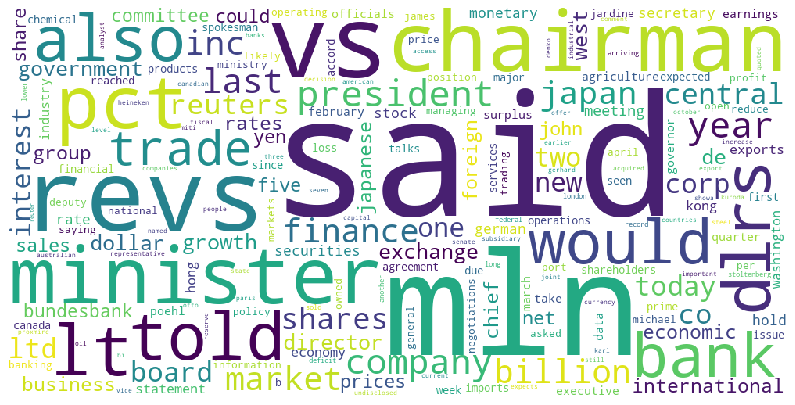

In [23]:
wordcloud(total_token_freq(combined_persons))

In [239]:
for k, v in organization_most_popular_terms.items():
    if len(v) != 0:
        print("Organization: ", k)
        print("tokens: ", v)
        print('\n')

Organization:  &lt;James
tokens:  ['tariffs']


Organization:  Makoto
  Kuroda
tokens:  ['deputy', 'trade']


Organization:  International Trade and
  Industry
tokens:  ['deputy', 'trade']


Organization:  the China Daily
tokens:  ['seven', 'china']


Organization:  The Ministry of International Trade and
  Industry
tokens:  ['ministry', 'energy']


Organization:  the
  Agency
tokens:  ['energy']


Organization:  Natural Resources and Energy
tokens:  ['energy']


Organization:  the Business Economics Department
tokens:  ['trade', 'deficit', 'first', 'quarter', 'billion']


Organization:  Hasrul Harahap
tokens:  ['sharply']


Organization:  NSW
tokens:  ['action', 'nsw']


Organization:  Labour Council
tokens:  ['action', 'nsw']


Organization:  The Indonesian Commodity Exchange
tokens:  ['commodity', 'exchange']


Organization:  the U.S.
  Department of Agriculture
tokens:  ['department']


Organization:  U.S. Dlrs
tokens:  ['department']


Organization:  Goodall
tokens:  ['pct']


Org

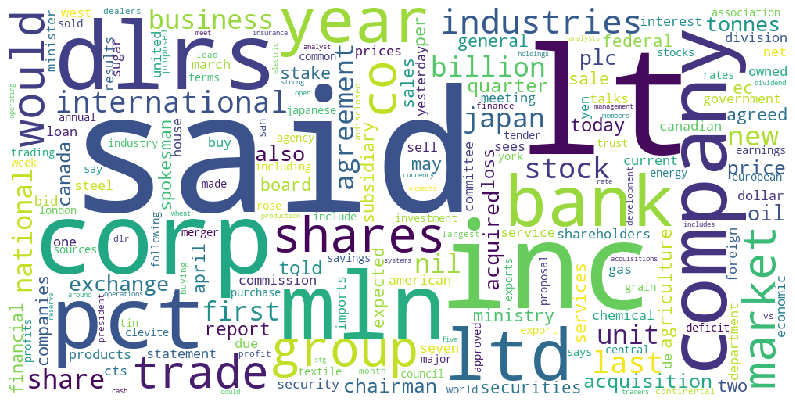

In [24]:
wordcloud(total_token_freq(combined_organizations))

In [241]:
for k, v in location_most_popular_terms.items():
    if len(v) != 0:
        print("Location: ", k)
        print("tokens: ", v)
        print('\n')

Location:  U.S.
tokens:  ['deputy', 'trade']


Location:  Japan
tokens:  ['deputy', 'trade']


Location:  Tokyo
tokens:  ['tariffs']


Location:  South Korea's
tokens:  ['trade']


Location:  South Korea
tokens:  ['billion', 'dlrs']


Location:  Australia
tokens:  ['australia', 'exports']


Location:  Washington
tokens:  ['deputy', 'trade']


Location:  Indonesia
tokens:  ['palm', 'oil']


Location:  Mexico
tokens:  ['encourage']


Location:  Brazil
tokens:  ['imports']


Location:  North Yemen
tokens:  ['north', 'yemen', 'sugar', 'buying', 'tender']


Location:  San
  Miguel
tokens:  ['government']


Location:  Kuwait
tokens:  ['billion', 'dlrs']


Location:  Manila
tokens:  ['ucpb', 'shares']


Location:  United
  States
tokens:  ['shares']


Location:  Queensland
tokens:  ['queensland']


Location:  Bundaberg
tokens:  ['queensland']


Location:  Fondiaria
tokens:  ['lt']


Location:  West Germany
tokens:  ['rate', 'inflation']


Location:  Paxar
tokens:  ['paxar', 'corp']


Location

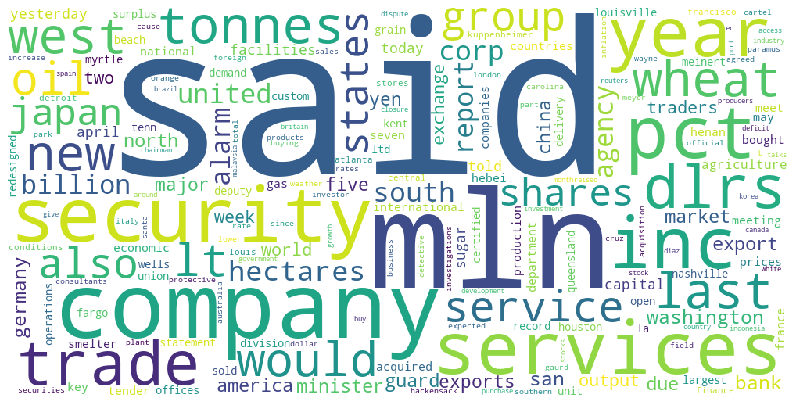

In [25]:
wordcloud(total_token_freq(combined_locations))

# Further experiments

## 1. Determine which entities most frequently co-occur in the same sentences

In [243]:
# co-occurences for relations among entities
def ent_relation(doc_id, doc_text):
    
    analyzed_doc = nlp(doc_text)
    
    doc_sent_entities = {}

    for sent in analyzed_doc.sents:
        sent_doc = sent.as_doc()
        count_entities = {}
        for entity in sent_doc.ents:
            if entity.text.strip() != "":
                if entity.label_ == "PERSON" or entity.label_ == "ORG" or entity.label_ == "GPE":
                    if entity.text.strip() not in count_entities.keys():
                        count_entities[entity.text.strip()] = 1
                    else:
                        count_entities[entity.text.strip()] += 1 
        sort_dic = sorted(count_entities.items(), key=lambda x:x[1], reverse=True)
        if len(sort_dic) > 1:
            doc_sent_entities[sent] = sort_dic
    return doc_sent_entities


In [244]:
combined_sents = {}

# Example for 50 docs
for doc_id in reuters.fileids()[0:50]: 
    #print(reuters.open(doc_id).read())
    dic_sents = ent_relation(doc_id, reuters.open(doc_id).read())
    
    for sent, value in dic_sents.items():
        if sent not in combined_sents.keys():
            combined_sents[sent] = value


In [245]:
# Display of co-occurence in sentences
counter = 0
for k, v in combined_sents.items():
    print('**************************')
    print("Sentence:", k)
    print("Entities:", v)
    print()
    counter += 1
    if counter == 25:
        break

**************************
Sentence: They told Reuter correspondents in Asian capitals a U.S.
  Move against Japan might boost protectionist sentiment in the
  U.S. And lead to curbs on American imports of their products.
      
Entities: [('U.S.', 2), ('Reuter', 1), ('Japan', 1)]

**************************
Sentence: The U.S. Has said it will impose 300 mln dlrs of tariffs on
  imports of Japanese electronics goods on April 17, in
  retaliation for Japan's alleged failure to stick to a pact not
  to sell semiconductors on world markets at below cost.
      
Entities: [('U.S.', 1), ('Japan', 1)]

**************************
Sentence: If the tariffs remain in place for any length of time
  beyond a few months it will mean the complete erosion of
  exports (of goods subject to tariffs) to the U.S.," said Tom
  Murtha, a stock analyst at the Tokyo office of broker &lt;James
  Capel and Co>.
      
Entities: [('U.S.', 1), ('Tom\n  Murtha', 1), ('Tokyo', 1), ('&lt;James', 1)]

**************

## 2. Applied (tentatively) a resolution function for different forms of same names of entities
#### As I was not able to count for multiple instances of same name and update keys, I have not (yet) included the function into step 2) as called within the extract_entities function

In [246]:
def names_resolution(entities_dictionary):
    entities_names = []
    for k in entities_dictionary.keys():
        entities_names.append(k)
    entities_sets = []
    for w in entities_names:
        entities_sets.append(set(w.split()))


    ind = list(itertools.combinations(range(len(entities_sets)), 2))

    for i, j in ind:
        l = entities_sets[i].intersection(entities_sets[j])
        if len(l) > 0:
            if len(entities_sets[i]) > len(entities_sets[j]):
                entities_sets[j] = entities_sets[i].union(entities_sets[j])
            elif len(entities_sets[j]) > len(entities_sets[i]):
                entities_sets[i] = entities_sets[i].union(entities_sets[j])


    right_names = []
    for w in entities_sets:
        right_names.append(' '.join(w))

    # changing the keys
    
    values = []
    for v in entities_dictionary.values():
        values.append(v)

    entities_dictionary_clean = dict(zip(right_names, values))
    return entities_dictionary_clean


In [247]:
# Example on persons dictionary for one document

for doc_id in reuters.fileids()[:1]: 
    persons, organizations, locations = extract_entities(doc_id, reuters.open(doc_id).read())
    clean_persons = names_resolution(persons)

# As mentioned, right now the function looses duplicates of the keys :/
for k, v in clean_persons.items():    
    print("Person:", k)
    print("Sentences:", v)
    print()

Person: Reuter
Sentences: ('test/14826', 'They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      ')

Person: Tom Murtha
Sentences: ('test/14826', 'If the tariffs remain in place for any length of time\n  beyond a few months it will mean the complete erosion of\n  exports (of goods subject to tariffs) to the U.S.," said Tom\n  Murtha, a stock analyst at the Tokyo office of broker &lt;James\n  Capel and Co>.\n      ')

Person: Sheen Paul
Sentences: ('test/14826', 'We must quickly open our markets, remove trade barriers and\n  cut import tariffs to allow imports of U.S. Products, if we\n  want to defuse problems from possible U.S. Retaliation," said\n  Paul Sheen, chairman of textile exporters &lt;Taiwan')

Person: Mills Lawrence
Sentences: ('test/14826', 'That is a very short-term view," said Lawrence Mills,\n  director-general of the Federation of Ho